# M11 Notes

# Installing an R Kernel

You can run R in Jupyter by installing an R kernel. 

Here's a [how to](M11_00_Rkernel.pdf) document to set this up.

In brief, here's what you do. First, at the command line:
```bash
conda create -n r_env r-essentials r-base
conda activate r_env
R # This opens the R shell
```
Then, in the R shell:
```r
IRkernel::installspec(name = 'r_env', displayname = 'R Environment')
quit()
```

Now, fire up a Jupyter Lab instance from the OpenOnDemand page and select the kernel when you create a new notebook.

![](r-kernel.png)

# Dplyr

* A **grammar** of data transformation.
* Treats functions as **verbs** in a vocabulary. 
* Similar to **SQL** &mdash; `SELECT`, `WHERE`, `ORDER BY`, `GROUP BY`, etc.
  - However, `arrange()` and `mutate()` are implicit in SQL as part of the `SELECT` clause.
* Makes use of the [magrittr](https://magrittr.tidyverse.org/) **pipes** `%>%` to connect operations.
* Introduces **a new data structure** -- the tibble.
* Part of the **Tidyverse**, a replacement of basic R.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Floating Point Comparisons

As with Python, there is a problem with floating point numbers you may encounter when using `==`.

In [2]:
sqrt(2) ^ 2 == 2
1 / 49 * 49 == 1

[1] FALSE

[1] FALSE

Recall that computers use **finite precision arithmetic**, since they can’t store an infinite number of digits. 

This means that that every float you see is an approximation. 

So, instead of relying on `==`, use `near()`:

In [5]:
near(sqrt(2) ^ 2,  2)
near(1 / 49 * 49, 1)

[1] TRUE

[1] TRUE

# Split-Apply-Combine

Split-Apply-Combine is a general **pattern** of data transformation.

* **SPLIT**: Split up table by observations into groups (smaller dataframes) based on a filter.
* **APPLY**: Apply a summary, aka aggregate function to each of the groups, which results in reducing these dataframes to single rows.
* **COMBINE**: Compine the collapsed group tables into a single table.

Examle where a dataframe is split by the values $[A,B,C]$ in `Col 1`:

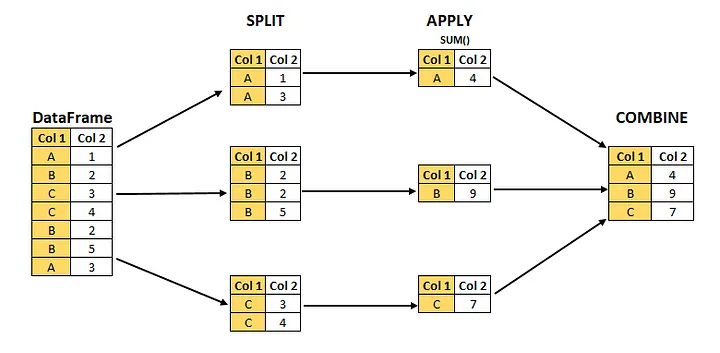

The resulting table with have as its implicit index the unique list of values in the grouping column.

**Simple Example**

In [6]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [11]:
agg_by_cyl <- mtcars %>% 
    group_by(cyl) %>% # Split
    summarise(avg_mpg = mean(mpg), avg_hp = mean(hp)) # Apply and Combine

In [12]:
agg_by_cyl

cyl,avg_mpg,avg_hp
<dbl>,<dbl>,<dbl>
4,26.66364,82.63636
6,19.74286,122.28571
8,15.10000,209.21429


In [16]:
agg_by_cyl <- agg_by_cyl %>% 
    mutate(hp_per_cyl = avg_hp / cyl)

In [17]:
agg_by_cyl

cyl,avg_mpg,avg_hp,hp_per_cyl
<dbl>,<dbl>,<dbl>,<dbl>
4,26.66364,82.63636,20.65909
6,19.74286,122.28571,20.38095
8,15.10000,209.21429,26.15179


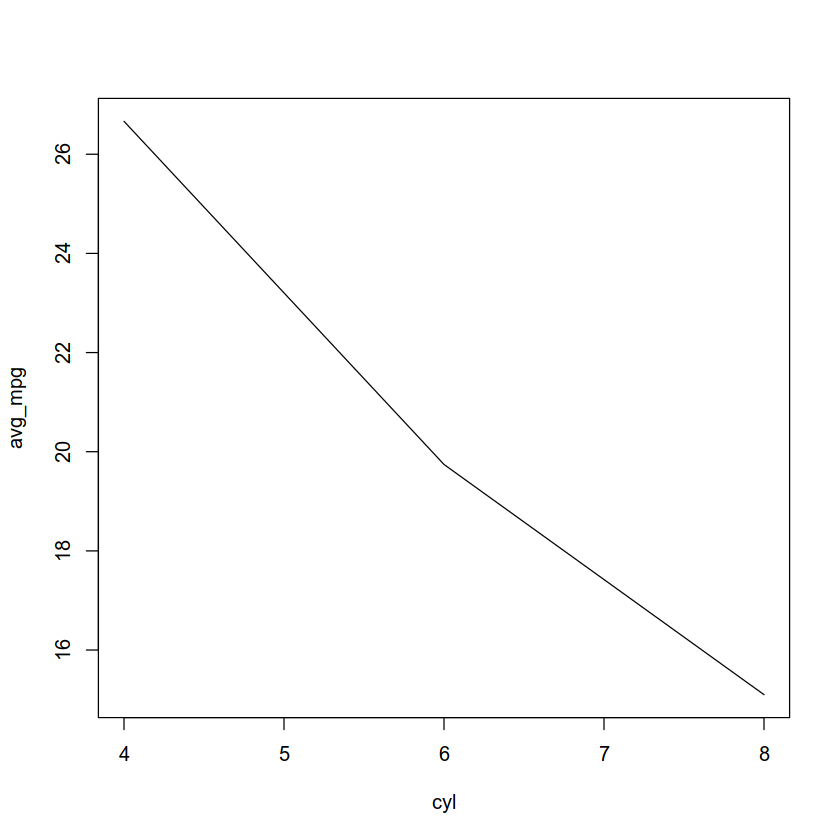

In [18]:
agg_by_cyl %>%
    select(cyl, avg_mpg) %>% 
    plot(type='l')

See [this article](https://pages.stat.wisc.edu/~yandell/R_for_data_sciences/curate/tidyverse.html) by Brian S. Yandell, a professor of statistics at Wisconsin, for a deeper dive into this topic.


# Helpers

Dplyr makes heavy use of helper functions. 

```r
na.rm = TRUE # A simple way of removing missing values from data if they are coded as NA.
n = n() #  Counts the number of observations in a group.
```

These often appear inside the arguments of data-masking verbs like `mutate()`, `filter()`, and `group_by()`. 

For example, 

```r
df %>% 
    group_by(group_variable) %>% 
    summarise(count = n())
```

This counts observations by group.

# Joins

See [Chapter 13, "Joins"](https://r4ds.hadley.nz/joins.html#introduction) in [_R for Data Science (2e)_](https://r4ds.hadley.nz/)

It always helps to know SQL, since these libraries essentially implement the relational model.